<a href="https://colab.research.google.com/github/Hirak-Pandya/Backtesting/blob/main/Backtestin_Rayner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 10.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install ta

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=312f67066d44c202950aaaf313bfec94cb94f88f8eb9aa3dfc2cc14fc98023ee
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


In [ ]:

import yfinance as yf
import ta
import numpy as np
import pandas as pd


In [ ]:
df = yf.download('RELIANCE.NS',start='2015-01-01', end='2022-4-11')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,419.247345,1367720
2015-01-02,439.880371,443.818054,437.998199,438.617340,418.137726,3383424
2015-01-05,438.344940,441.267212,432.946106,433.812897,413.557648,4662967
2015-01-06,430.915344,432.401276,412.093750,414.124512,394.788544,8596809
2015-01-07,414.619812,425.367950,414.570282,423.139069,403.382111,9562421
...,...,...,...,...,...,...
2022-04-04,2655.449951,2675.000000,2641.649902,2663.699951,2663.699951,3659307
2022-04-05,2651.100098,2669.899902,2620.699951,2626.050049,2626.050049,6068663
2022-04-06,2587.100098,2634.500000,2587.100098,2619.050049,2619.050049,5656703


In [ ]:
df.Close=df['Adj Close']

In [ ]:
def applyindicators(df):
  df['SMA_200']=df.Close.rolling(200).mean()
  df['SMA_20']=df.Close.rolling(20).mean()
  df['stddev']=df.Close.rolling(20).std()
  df['Upper']=df.SMA_20 + 2.5*df.stddev
  df['Lower']=df.SMA_20 - 2.5*df.stddev
  df['rsi']= ta.momentum.rsi(df.Close,2)

In [ ]:
applyindicators(df)
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi
Date,,,,,,,,,,,,
2015-01-01,438.988831,441.812073,437.676270,419.247345,419.247345,1367720,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,439.880371,443.818054,437.998199,418.137726,418.137726,3383424,NaN,NaN,NaN,NaN,NaN,0.000000
2015-01-05,438.344940,441.267212,432.946106,413.557648,413.557648,4662967,NaN,NaN,NaN,NaN,NaN,0.000000
2015-01-06,430.915344,432.401276,412.093750,394.788544,394.788544,8596809,NaN,NaN,NaN,NaN,NaN,0.000000
2015-01-07,414.619812,425.367950,414.570282,403.382111,403.382111,9562421,NaN,NaN,NaN,NaN,NaN,44.614463
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,2655.449951,2675.000000,2641.649902,2663.699951,2663.699951,3659307,2372.445255,2493.594995,138.210004,2839.120004,2148.069986,73.345744
2022-04-05,2651.100098,2669.899902,2620.699951,2626.050049,2626.050049,6068663,2374.517504,2512.919995,127.418600,2831.466494,2194.373496,23.682595
2022-04-06,2587.100098,2634.500000,2587.100098,2619.050049,2619.050049,5656703,2376.534505,2532.097498,111.312905,2810.379760,2253.815235,18.919115


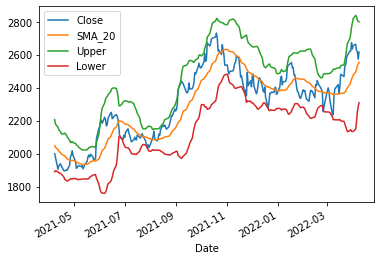

In [ ]:
df.tail(250)[['Close','SMA_20','Upper','Lower']].plot()

In [ ]:
def conditions(df):
  df['Buy']=np.where((df.Close > df.SMA_200) & (df.Close<df.Lower) & (0.97 * df.Close >= df.Low.shift(-1)),1,0)
  df['Sell']=np.where((df.rsi > 50),1,0)
  df['Buyprice']=0.97*df.Close
  df['Sellprice']=df.Open.shift(-1)

In [ ]:
conditions(df)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2015-01-01,438.988831,441.812073,437.676270,419.247345,419.247345,1367720,NaN,NaN,NaN,NaN,NaN,NaN,0,0,406.669925,439.880371
2015-01-02,439.880371,443.818054,437.998199,418.137726,418.137726,3383424,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,405.593594,438.344940
2015-01-05,438.344940,441.267212,432.946106,413.557648,413.557648,4662967,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,401.150918,430.915344
2015-01-06,430.915344,432.401276,412.093750,394.788544,394.788544,8596809,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,382.944887,414.619812
2015-01-07,414.619812,425.367950,414.570282,403.382111,403.382111,9562421,NaN,NaN,NaN,NaN,NaN,44.614463,0,0,391.280647,426.011841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,2655.449951,2675.000000,2641.649902,2663.699951,2663.699951,3659307,2372.445255,2493.594995,138.210004,2839.120004,2148.069986,73.345744,0,1,2583.788953,2651.100098
2022-04-05,2651.100098,2669.899902,2620.699951,2626.050049,2626.050049,6068663,2374.517504,2512.919995,127.418600,2831.466494,2194.373496,23.682595,0,0,2547.268547,2587.100098
2022-04-06,2587.100098,2634.500000,2587.100098,2619.050049,2619.050049,5656703,2376.534505,2532.097498,111.312905,2810.379760,2253.815235,18.919115,0,0,2540.478547,2595.100098


In [ ]:
Buy_Sells = df[(df.Buy == 1) | (df.Sell==1)]

In [ ]:
Buy_Sells

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2015-01-09,420.216766,426.952911,418.532715,406.215240,406.215240,6180769,NaN,NaN,NaN,NaN,NaN,65.946668,0,1,394.028783,426.209961
2015-01-15,416.056213,431.460175,416.056213,408.080322,408.080322,7811847,NaN,NaN,NaN,NaN,NaN,79.601801,0,1,395.837913,425.962311
2015-01-16,425.962311,433.391876,422.024628,410.653717,410.653717,8831705,NaN,NaN,NaN,NaN,NaN,84.093693,0,1,398.334106,431.014404
2015-01-19,431.014404,438.840240,425.343170,415.351868,415.351868,6156390,NaN,NaN,NaN,NaN,NaN,91.183047,0,1,402.891312,436.611359
2015-01-20,436.611359,448.523438,435.298798,426.400848,426.400848,6166247,NaN,NaN,NaN,NaN,NaN,97.152463,0,1,413.608823,448.251038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29,2638.000000,2638.000000,2607.399902,2622.550049,2622.550049,4007695,2363.729254,2435.330005,116.126107,2725.645273,2145.014737,98.735108,0,1,2543.873547,2639.899902
2022-03-30,2639.899902,2688.000000,2617.100098,2672.949951,2672.949951,7297028,2366.214003,2451.000000,126.080560,2766.201400,2135.798600,99.736476,0,1,2592.761453,2664.949951
2022-04-01,2636.000000,2665.149902,2622.000000,2655.850098,2655.850098,3656408,2370.376755,2476.687500,136.983333,2819.145833,2134.229167,65.888606,0,1,2576.174595,2655.449951


In [ ]:
def matchtrades(df):
  Buy_Sells = df[(df.Buy == 1) | (df.Sell == 1)]
  matched_Buy_Sells = Buy_Sells[(Buy_Sells.Buy.diff()==1) | (Buy_Sells.Sell.diff()==1)]
  return matched_Buy_Sells

In [ ]:
trades=matchtrades(df)
trades  

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2018-10-04,1178.330566,1179.222168,1095.614624,1097.921753,1097.921753,23432473,988.930923,1206.478918,31.591843,1285.458527,1127.499310,1.404924,1,0,1064.984100,1089.175659
2018-10-10,1083.628296,1105.372192,1074.118408,1078.208740,1078.208740,9592247,992.335660,1174.265222,64.334650,1335.101847,1013.428597,51.908476,0,1,1045.862478,1054.009033


In [ ]:
profit = (trades.Sellprice.shift(-1)-trades.Buyprice)/trades.Buyprice

In [ ]:
profit

Date
2018-10-04   -0.010305
2018-10-10         NaN
dtype: float64